In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
from sklearn import tree


In [2]:
hrattr_data = pd.read_csv("C:/Users/user/Downloads/emp.csv")

In [3]:
print (hrattr_data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

<Axes: xlabel='Attrition', ylabel='count'>

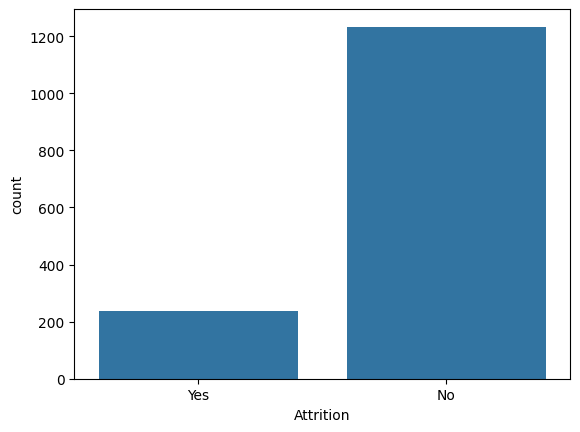

In [4]:
hrattr_data['Attrition_ind'] = 0
hrattr_data.loc[hrattr_data['Attrition']=='Yes','Attrition_ind'] = 1

sns.countplot(x='Attrition', data=hrattr_data)

In [5]:
dummy_busnstrvl = pd.get_dummies(hrattr_data['BusinessTravel'],prefix='busns_trvl')
dummy_dept = pd.get_dummies(hrattr_data['Department'],prefix='dept')
dummy_edufield = pd.get_dummies(hrattr_data['EducationField'],prefix='edufield')
dummy_gender = pd.get_dummies(hrattr_data['Gender'],prefix='gend')
dummy_jobrole = pd.get_dummies(hrattr_data['JobRole'],prefix='jobrole')
dummy_maritstat = pd.get_dummies(hrattr_data['MaritalStatus'],prefix='maritalstat')
dummy_overtime = pd.get_dummies(hrattr_data['OverTime'],prefix='overtime')



In [6]:
continuous_columns = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction',
'HourlyRate', 'JobInvolvement', 'JobLevel','JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears',
'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
'YearsWithCurrManager']

hrattr_continuous = hrattr_data[continuous_columns]

hrattr_continuous['Age'].describe()
hrattr_data['BusinessTravel'].value_counts()



BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [7]:
hrattr_data_new = pd.concat([dummy_busnstrvl,dummy_dept,dummy_edufield,dummy_gender,dummy_jobrole,
  dummy_maritstat,dummy_overtime,hrattr_continuous,hrattr_data['Attrition_ind']],axis=1)



In [8]:
# Train & Test split
x_train,x_test,y_train,y_test = train_test_split(hrattr_data_new.drop(['Attrition_ind'],axis=1),
                                                 hrattr_data_new['Attrition_ind'],train_size = 0.7,random_state=42)



In [9]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_fit = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
dt_fit.fit(x_train,y_train)

print ("\nDecision Tree - Train Confusion Matrix\n\n",pd.crosstab(y_train,dt_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))
print ("\nDecision Tree - Train accuracy:",round(accuracy_score(y_train,dt_fit.predict(x_train)),3))
print ("\nDecision Tree - Train Classification Report\n",classification_report(y_train,dt_fit.predict(x_train)))

print ("\n\nDecision Tree - Test Confusion Matrix\n\n",pd.crosstab(y_test,dt_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))
print ("\nDecision Tree - Test accuracy:",round(accuracy_score(y_test,dt_fit.predict(x_test)),3))
print ("\nDecision Tree - Test Classification Report\n",classification_report(y_test,dt_fit.predict(x_test)))






Decision Tree - Train Confusion Matrix

 Predicted    0   1
Actuall           
0          844   9
1           98  78

Decision Tree - Train accuracy: 0.896

Decision Tree - Train Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       853
           1       0.90      0.44      0.59       176

    accuracy                           0.90      1029
   macro avg       0.90      0.72      0.77      1029
weighted avg       0.90      0.90      0.88      1029



Decision Tree - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          361  19
1           49  12

Decision Tree - Test accuracy: 0.846

Decision Tree - Test Classification Report
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       380
           1       0.39      0.20      0.26        61

    accuracy                           0.85       441
   macro avg       0.63      0.57      0.59       4

In [10]:
feature_names = list(hrattr_data_new.columns)
feature_names

['busns_trvl_Non-Travel',
 'busns_trvl_Travel_Frequently',
 'busns_trvl_Travel_Rarely',
 'dept_Human Resources',
 'dept_Research & Development',
 'dept_Sales',
 'edufield_Human Resources',
 'edufield_Life Sciences',
 'edufield_Marketing',
 'edufield_Medical',
 'edufield_Other',
 'edufield_Technical Degree',
 'gend_Female',
 'gend_Male',
 'jobrole_Healthcare Representative',
 'jobrole_Human Resources',
 'jobrole_Laboratory Technician',
 'jobrole_Manager',
 'jobrole_Manufacturing Director',
 'jobrole_Research Director',
 'jobrole_Research Scientist',
 'jobrole_Sales Executive',
 'jobrole_Sales Representative',
 'maritalstat_Divorced',
 'maritalstat_Married',
 'maritalstat_Single',
 'overtime_No',
 'overtime_Yes',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction